In [1]:
import io
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded['data_k_mean.txt'] ), 
              sep=" " ,  header = None, dtype = 'Float64')
# print(train_data[0])

Saving data_k_mean.txt to data_k_mean.txt


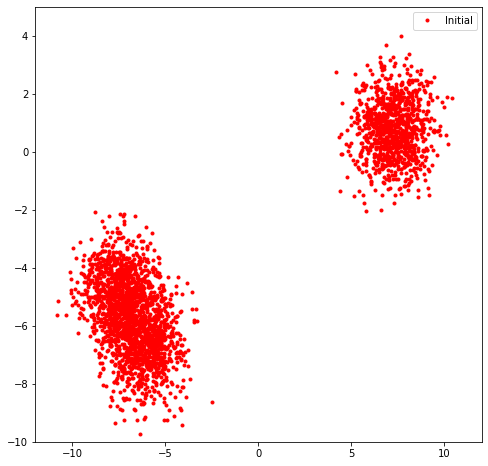

In [2]:
%matplotlib inline
train_data=np.array(train_data)
plt.figure(figsize=(8,8))
#PLOTTING TRAIN DATA
plt.plot(train_data[:,0],train_data[:,1],'r.',label='Initial')

plt.legend()
plt.xlim([-12,12])
plt.ylim([-10,5])  
plt.show()

Enter k:7


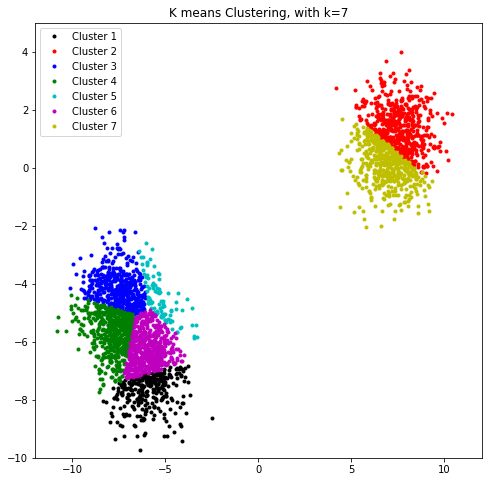

In [45]:
k=int(input("Enter k:"))
# k=2
random.seed(10)
centroid=[]
sz=train_data[:,0].size
#PICKING k RANDOM CENTROIDS
for x in range(k):
  pos=random.randint(0, sz)
  centroid.append([train_data[pos][0],train_data[pos][1]])

old_cluster=[]
new_cluster=[]
iter=1

# K MEANS CLUSTERING ALGORITHM
while 1:
  for i in range(sz):
    current_point=[train_data[i][0],train_data[i][1]]
    distances=[]
    # MEASURING DISTANCES FOR EACH POINT FROM K CENTROIDS
    for x in range(k):
      distances.append(math.sqrt(math.pow((centroid[x][0]-current_point[0]),2)+math.pow((centroid[x][1]-current_point[1]),2)))
    new_cluster.append(distances.index(min(distances)))

  # CHECKING TO SEE IF THE OLD AND NEW CLUSTERS MATCH; IF SO, BREAK
  if iter>1:
    old=set(old_cluster)
    new=set(new_cluster)
    if old==new:
      break

  # OLD != NEW, SO NOW WE UPDATE THE K CENTROID VALUES
  for x in range(k):
    # TAKING INDICES OF ALL ELEMENTS OF x'th CLUSTER
    l=[i for i,val in enumerate(new_cluster) if val==x]

    centroid_update=[0,0]
    # CALCULATING MEAN VALUE OF THE CLUSTER x
    for m in l:
      centroid_update[0]=centroid_update[0]+train_data[m][0]
      centroid_update[1]=centroid_update[1]+train_data[m][1]
    centroid[x][0]=centroid_update[0]/len(l)
    centroid[x][1]=centroid_update[1]/len(l)

  old_cluster=[]
  old_cluster=new_cluster
  new_cluster=[]
  iter=iter+1

# PLOTTING CLUSTERS WITH SEPARATE COLORS
plt.figure(figsize=(8,8))
colours=['k.','r.','b.','g.','c.','m.','y.']
for x in range(k):
    l=[i for i,val in enumerate(old_cluster) if val==x]
    temp=[]
    for m in l:
      temp.append([train_data[m][0],train_data[m][1]])
    temp=np.array(temp)
    labl='Cluster '+str(x+1)
    plt.plot(temp[:,0],temp[:,1],colours[x%7],label=labl)
    
plt.legend()
plt.title('K means Clustering, with k='+str(k))
plt.xlim([-12,12])
plt.ylim([-10,5])  
plt.show()